# Convert HeadLoss to Mutual Information matrix

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

In [0]:
%run "./0 - Library"

In [0]:
# Read simulation data
query = """SELECT * FROM delta.`dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/simulation_results`"""
sdf_simulation_results = spark.sql(query).withColumn("LeakDemand",col("LeakDemand").cast("double")).withColumn("PressureDrop",col("PressureDrop").cast("double"))

In [0]:
pdf_simulation_results = sdf_simulation_results.toPandas().set_index(['LeakDemand', 'LeakNode', 'SensorLocation']).unstack('SensorLocation')
pdf_simulation_results.columns = pdf_simulation_results.columns.droplevel()
pdf_simulation_results = pdf_simulation_results.reset_index()
pdf_simulation_results

Out[177]:

SensorLocation,LeakDemand,LeakNode,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,4,5,6,7,8,9
0,3.6,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
1,3.6,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
2,3.6,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
3,3.6,13,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
4,3.6,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,180.0,5,0.0,1.1,1.0,1.1,1.1,1.0,1.0,0.9,0.8,0.7,0.7,0.0,0.7,0.7,0.7,0.7,0.7,0.7,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.1,1.1,1.1,1.1,1.0
1546,180.0,6,0.0,1.3,1.3,1.3,1.3,1.2,1.2,1.0,0.8,0.7,0.7,0.0,0.7,0.7,0.7,0.7,0.7,0.7,0.8,0.9,0.7,0.7,0.7,0.7,0.8,0.8,0.8,1.1,1.3,1.4,1.3,1.3
1547,180.0,7,0.0,1.4,1.4,1.4,1.4,1.3,1.2,1.0,0.8,0.7,0.7,0.0,0.7,0.7,0.7,0.7,0.7,0.7,0.8,1.0,0.7,0.7,0.7,0.8,0.8,0.8,0.8,1.1,1.3,1.5,1.4,1.4
1548,180.0,8,0.0,1.5,1.5,1.5,1.5,1.4,1.3,1.1,0.9,0.7,0.7,0.0,0.7,0.7,0.7,0.7,0.7,0.8,0.9,1.0,0.7,0.7,0.7,0.8,0.8,0.8,0.8,1.1,1.3,1.5,1.5,1.5


In [0]:
# store as CSV (maybe to transfer towards D-Wave cloud)
pdf_simulation_results.to_csv("/dbfs/tmp/simulation_results.csv", sep=';', decimal = ',')
dbutils.fs.mv("dbfs:/tmp/simulation_results.csv", "dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/simulation_results.csv")

Out[178]: True

In [0]:
list_SensorLocations = list(pdf_simulation_results.columns)
list_SensorLocations.remove('LeakDemand')
list_SensorLocations.remove('LeakNode')

# Solving Feature Selection on a Quantum Computer
There are different methods of approximating the hard calculation of optimally selecting $n \choose k$ features to maximize MI. The approach followed here assumes conditional independence of features and limits CMI calculations to permutations of three features. The optimal set of features, $S$, is then approximated by:

$\arg \max_S \sum_{i \in S} \left \{ I(X_i;Y) + \sum_{j \in S, j \ne i} I(X_j;Y |X_i) \right \}$


The left-hand component, $I(X_i;Y)$, represents MI between the variable of interest and a particular feature; maximizing selects features that best predict the variable of interest. The right-hand component, $I(X_j;Y |X_i)$, represents conditional MI between the variable of interest and a feature given the prior selection of another feature; maximizing selects features that complement information about the variable of interest rather than provide redundant information.

This approximation is still a hard calculation. The following subsection demonstrates a method for formulating it for solution on the D-Wave quantum computer. The method is based on the 2014 paper, [Effective Global Approaches for Mutual Information Based Feature Selection](https://dl.acm.org/citation.cfm?id=2623611), by Nguyen, Chan, Romano, and Bailey published in the Proceedings of the 20th ACM SIGKDD international conference on knowledge discovery and data mining.

## MIQUBO: QUBO Representation of Feature Selection
D-Wave systems solve binary quadratic models (BQM)&mdash;the Ising model traditionally used in statistical mechanics and its computer-science equivalent, the quadratic unconstrained binary optimization (QUBO) problem. Given $N$ variables $x_1,...,x_N$, where each variable $x_i$ can have binary values $0$ or $1$, the system finds assignments of values that minimize,
    
$\sum_i^N q_ix_i + \sum_{i<j}^N q_{i,j}x_i  x_j$,
    
where $q_i$ and $q_{i,j}$ are configurable (linear and quadratic) coefficients. To formulate a problem for the D-Wave system is to program $q_i$ and $q_{i,j}$ so that assignments of $x_1,...,x_N$ also represent solutions to the problem.

For feature selection, the Mutual Information QUBO (MIQUBO) method formulates a QUBO based on the approximation above for $I({X_k}; Y)$, which can be submitted to the D-Wave quantum computer for solution.

The reduction of scope to permutations of three variables in this approximate formulation for MI-based optimal feature selection makes it a natural fit for reformulation as a QUBO: 

|  | **Optimization** &nbsp; &nbsp; | **Linear <br>Terms** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |	**Quadratic <br>Terms** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| **Formula** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |	
|:-|:-----------------|:---------------------|:-------------------------|:------------|
| **Feature <br>Selection** &nbsp; &nbsp; | Maximize &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |$I(X_i;Y)$  | $I(X_j;Y \|X_i)$  | $\sum_{i \in S} \left \{ I(X_i;Y) + \sum_{j \in S, j \ne i} I(X_j;Y \|X_i) \right \}$ |
| **QUBO** | Minimize &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| $q_ix_i$ | $q_{i,j}x_ix_j$ | $\sum_i^N q_ix_i + \sum_{i<j}^N q_{i,j}x_i  x_j$ | 

You can represent each choice of $n \choose k$ features as the value of solution $x_1,...,x_N$ by encoding $x_i=1$ if feature $X_i$ should be selected and $x_i=0$ if not. With solutions encoded this way, you can represent the QUBO in matrix format, $\mathbf{x}^T \mathbf{Q x}$, where $\mathbf Q$ is an $n$ x $n$ matrix and $\mathbf{x}$ is an $n$ x $1$ matrix (a vector) that should have $k$ ones representing the selected features. 

To map the feature-selection formula to a QUBO, set the elements of $\mathbf Q$ such that

 * diagonal elements (linear coefficients) represent MI: $Q_{ii} \leftarrow -I(X_i;Y)$ 
 * non-diagonal elements (quadratic elements) represent CMI: $Q_{ij} \leftarrow -I(X_j;Y |X_i)$

These QUBO terms are negative because the quantum computer seeks to minimize the programmed problem while the feature-selection formula maximizes. The following subsection codes this and then completes the formulation by adding the $n \choose k$ constraint to the QUBO.

### MIQUBO
This subsection applies the MIQUBO formulation by configuring the QUBO in three parts: 
  (1) linear biases that maximize MI between the variable of interest and each feature 
  (2) quadratic biases that maximize CMI between the variable of interest and each feature, given the prior choice of another feature 
  (3) selection of just $k$ features.

Create a BQM and set the linear coefficients as the MI between `out` and each potential feature.

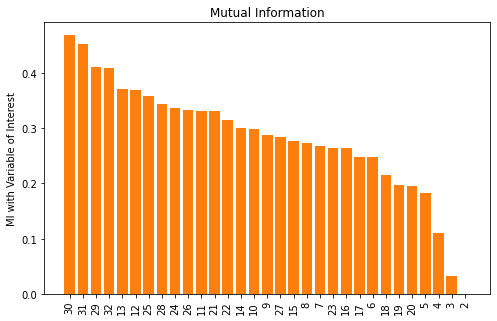

In [0]:
import dimod
import itertools

bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

features = list(set(list_SensorLocations).difference(('1',)))

mi_set = {}
for feature in features:
    mi_set[feature] = mutual_information(prob(pdf_simulation_results[['LeakNode', feature]].values.astype(float)), 1)

plot_mi(mi_set)

In [0]:
keep = 20

sorted_mi = sorted(mi_set.items(), key=lambda pair: pair[1], reverse=True)
pdf_simulation_reduced = pdf_simulation_results[[column[0] for column in sorted_mi[0:keep]] + ["LeakNode"]]
features = list(set(pdf_simulation_reduced.columns).difference(('LeakNode',)))

print("Submitting for {} features: {}".format(keep, features))

Submitting for 20 features: ['24', '10', '14', '30', '32', '13', '25', '7', '29', '22', '8', '26', '11', '28', '21', '12', '31', '9', '27', '15']

In [0]:
## # Build the I-matrix (on request of Peter)
## I_matrix = {}
## analysis_results_per_leak_demand_level = {}
## for f0, f1 in itertools.combinations(features, 2):
##     mi_00 = mutual_information(prob(pdf_simulation_results[[f0, f0]].values.astype(float)), 1)
##     mi_01 = mutual_information(prob(pdf_simulation_results[[f0, f1]].values.astype(float)), 1)
##     mi_10 = mutual_information(prob(pdf_simulation_results[[f1, f0]].values.astype(float)), 1)
##     I_matrix[f0, f0] = mi_00
##     I_matrix[f0, f1] = mi_01
##     I_matrix[f1, f0] = mi_10
## pdf_imatrix = pd.DataFrame(pd.Series(I_matrix)).unstack(level=-1)    
## pdf_imatrix.to_csv("/dbfs/tmp/imatrix.csv", sep=';', decimal = ',')
## dbutils.fs.mv("dbfs:/tmp/imatrix.csv", "dbfs:/mnt/dlwadlsgen2/waterlink/99QuantumSensorPlacementDEL20/imatrix.csv")

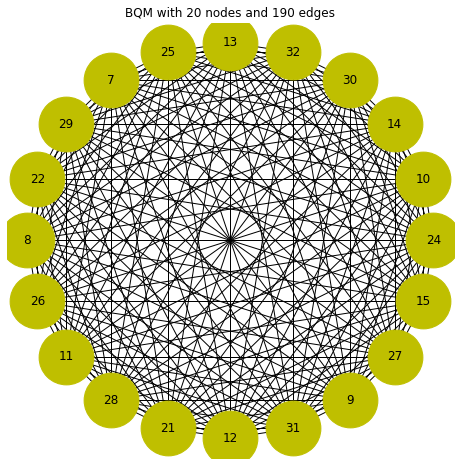

In [0]:
bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)

# add the features
for feature in features:
    mi = mutual_information(prob(pdf_simulation_results[['LeakNode', feature]].values.astype(float)), 1)
    bqm.add_variable(feature, -mi)

for f0, f1 in itertools.combinations(features, 2):
    cmi_01 = conditional_mutual_information(prob(pdf_simulation_results[['LeakNode', f0, f1]].values.astype(float)), 1, 2)
    cmi_10 = conditional_mutual_information(prob(pdf_simulation_results[['LeakNode', f1, f0]].values.astype(float)), 1, 2)
    bqm.add_interaction(f0, f1, -cmi_01)
    bqm.add_interaction(f1, f0, -cmi_10)

bqm.normalize()  

plot_bqm(bqm)

In [0]:
# bqm.adj['5']['30']
# bqm.linear['31']

In [0]:
k = 3  # looking for k sensors to be placed
bqm.update(dimod.generators.combinations(bqm.variables, k, strength=5))   # strength : balance between MI and number of sensor requirement

In [0]:
##### can bqm be stored in some file-format, and then be transferred to D-Wave Leap SDK ????

# t = bqm.to_serializable

## https://test-projecttemplate-dimod.readthedocs.io/en/release_notes/reference/generated/dimod.BinaryQuadraticModel.to_json.html#dimod.BinaryQuadraticModel.to_json
##   not yet available in latest version of DIMOD (https://test-projecttemplate-dimod.readthedocs.io/en/latest/reference/bqm/bqm_functions.html)



In [0]:
# Exhaustive calculation ==> most precise evaluation of the problem defined.
sampler = dimod.ExactSolver()
result = sampler.sample(bqm)

In [0]:
# plot_solutions(result)

In [0]:
result.data(['energy'])

Out[197]: <generator object SampleSet.data at 0x7f34e0e49c80>

In [0]:
## appear to be sorted per 'energy' from minimum to maximum ==> best-choice is the first in the list
features = []
energies = []
## i = 0 # only select first 10 solutions found
for sample, energy in result.data(['sample', 'energy']):
    energies.append(energy)
    features.append([key for (key, value) in sample.items() if value == 1])
    #i += 1
    #if i >= 10:
    #  break

In [0]:
features[0]

Out[203]: ['11', '15', '25']

In [0]:
features[energies.index(min(energies))]

Out[204]: ['11', '15', '25']

In [0]:
features.index(['12', '21', '27'])

Out[206]: 480

In [0]:
features[energies.index(max(energies))]

Out[214]: ['10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '7',
 '8',
 '9']